In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
X,y = mglearn.datasets.make_wave()
plt.plot(X,y,'o',c='k')
print X.shape,y.shape
to_predict = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)
dt_reg = DecisionTreeRegressor(min_samples_split=3)
dt_reg.fit(X,y)
dt_reg_predictions = dt_reg.predict(to_predict)
plt.plot(to_predict,dt_reg_predictions,label='DecisionTr"ee Regression')
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg_predictions = lin_reg.predict(to_predict)
plt.plot(to_predict,lin_reg_predictions,label='Linear Regression')
plt.xlabel('Input Feature')
plt.ylabel('Regression Output')
plt.legend()
# plt.show()

(100, 1) (100,)


In [23]:
from sklearn.preprocessing import OneHotEncoder
X,y = mglearn.datasets.make_wave()
plt.plot(X,y,'o',c='k')
bins = np.linspace(-3,3,11)
plt.vlines(bins,-3,3,linewidth=1,alpha=0.2)
which_bins = np.digitize(X,bins=bins)
enc = OneHotEncoder(sparse=False)
X_binned = enc.fit_transform(which_bins)
to_predict = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)
to_predict_binned = enc.transform(np.digitize(to_predict,bins=bins))
dt_reg = DecisionTreeRegressor(min_samples_split=3)
dt_reg.fit(X_binned,y)
dt_reg_predictions = dt_reg.predict(to_predict_binned)
plt.plot(to_predict,dt_reg_predictions,label='DecisionTree Regression Binned')
lin_reg = LinearRegression()
lin_reg.fit(X_binned,y)
lin_reg_predictions = lin_reg.predict(to_predict_binned)
plt.plot(to_predict,lin_reg_predictions,'--',label='Linear Regression Binned')
plt.xlabel('Input Feature')
plt.ylabel('Regression Output')
plt.legend()
# plt.show()

Combining X_binned with X has (100, 11) dimensions


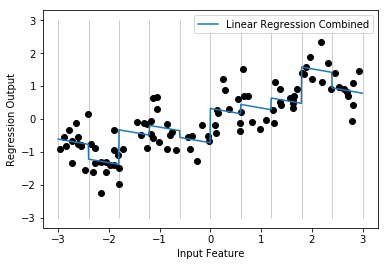

In [33]:
bins = np.linspace(-3,3,11)
plt.plot(X,y,'o',c='k')
which_bins = np.digitize(X,bins=bins)
enc = OneHotEncoder(sparse=False)
X_binned = enc.fit_transform(which_bins)
to_predict = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)
to_predict_binned = enc.transform(np.digitize(to_predict,bins=bins))
X_combined = np.hstack([X_binned, X])
to_predict_combined = np.hstack([to_predict_binned,to_predict])
print "Combining X_binned with X has {} dimensions".format(X_combined.shape)
lin_reg = LinearRegression()
lin_reg.fit(X_combined,y)
lin_reg_predictions = lin_reg.predict(to_predict_combined)
plt.plot(to_predict,lin_reg_predictions,'-',label='Linear Regression Combined')
plt.vlines(bins,-3,3,linewidth=1,alpha=0.2)
plt.xlabel('Input Feature')
plt.ylabel('Regression Output')
plt.legend()
plt.show()

X_prodcut has (100, 20) dimensions


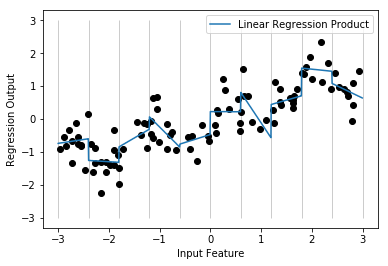

In [41]:
bins = np.linspace(-3,3,11)
plt.plot(X,y,'o',c='k')
which_bins = np.digitize(X,bins=bins)
enc = OneHotEncoder(sparse=False)
X_binned = enc.fit_transform(which_bins)
to_predict = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)
to_predict_binned = enc.transform(np.digitize(to_predict,bins=bins))
X_product = np.hstack([X_binned,X*X_binned])
print "X_prodcut has {} dimensions".format(X_product.shape)
to_predict_product = np.hstack([to_predict_binned,to_predict*to_predict_binned])
lin_reg = LinearRegression()
lin_reg.fit(X_product,y)
lin_reg_predictions = lin_reg.predict(to_predict_product)
plt.plot(to_predict,lin_reg_predictions,'-',label='Linear Regression Product')
plt.vlines(bins,-3,3,linewidth=1,alpha=0.2)
plt.xlabel('Input Feature')
plt.ylabel('Regression Output')
plt.legend()
plt.show()